In [302]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [303]:
## load the data
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
gender = pd.read_csv("gender_submission.csv")

In [304]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [305]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [306]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [307]:
test.insert(1, 'Survived', gender['Survived'])

In [308]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [309]:
### check missing values in train data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [310]:
## Drop unwanted data
train.drop (columns=['Cabin', 'PassengerId','Name',"SibSp", 'Parch','Ticket','Fare'], axis=1, inplace=True)


In [311]:
train.describe()

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


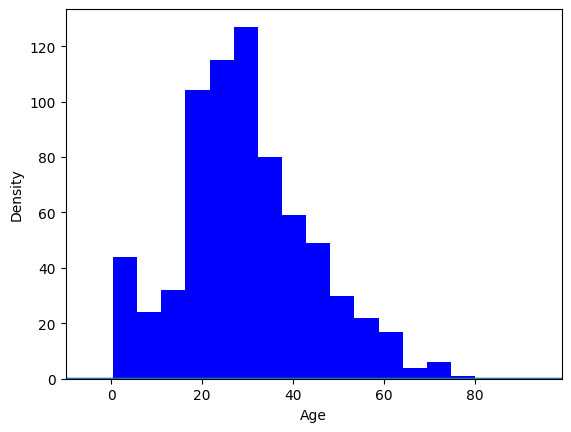

In [312]:
## visualize age data 
Age_data = train["Age"].hist(bins = 15, color ='blue')
train["Age"].plot(kind ='density')
plt.xlim(-10,99)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [313]:
## replace missing values with mean for the Age and remove the rows with missinng values for the  Embarked
train['Age'] = train['Age'].fillna(train['Age'].mean())
train.dropna(subset= ["Embarked"], inplace= True)


In [314]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

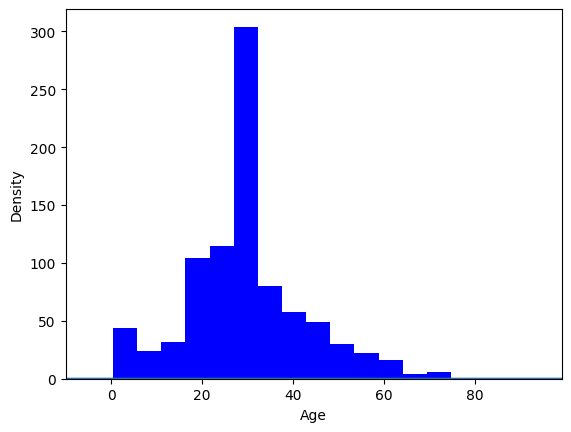

In [315]:
## visualize age data after replacing missing value with mean
Age_data = train["Age"].hist(bins = 15, color ='blue')
train["Age"].plot(kind ='density')
plt.xlim(-10,99)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [316]:
### Apply the same for the test data
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [317]:
## drop cabin and replace Age missing values with the mean values.
test.drop(columns=['Cabin', 'PassengerId','Name',"SibSp", 'Parch','Ticket','Fare'], axis=1, inplace=True)
test['Age'] = test['Age'].fillna(test['Age'].mean())



In [318]:
test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [319]:
### Data Exploration
train

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,S
1,1,1,female,38.000000,C
2,1,3,female,26.000000,S
3,1,1,female,35.000000,S
4,0,3,male,35.000000,S
...,...,...,...,...,...
886,0,2,male,27.000000,S
887,1,1,female,19.000000,S
888,0,3,female,29.699118,S
889,1,1,male,26.000000,C


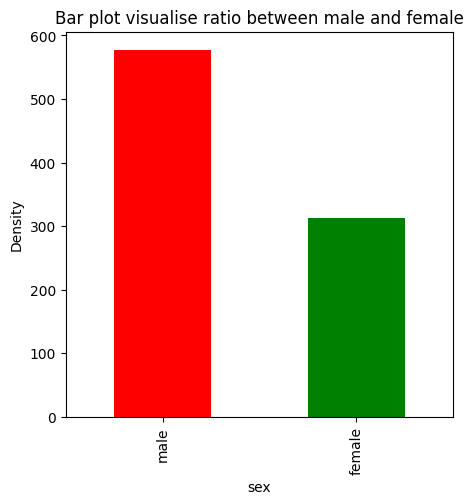

In [320]:
### explorinng the train data
plt.figure(figsize=(5,5))
train['Sex'].value_counts().plot(kind="bar", color = ['red','green'])
plt.xlabel('sex')
plt.ylabel('Density')
plt.title("Bar plot visualise ratio between male and female")
plt.show()

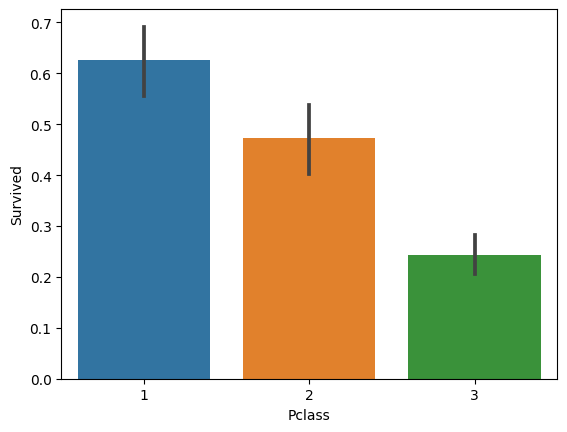

In [321]:
### Exploring data survived people per class
sns.barplot (x='Pclass', y='Survived', data = train)
plt.show()

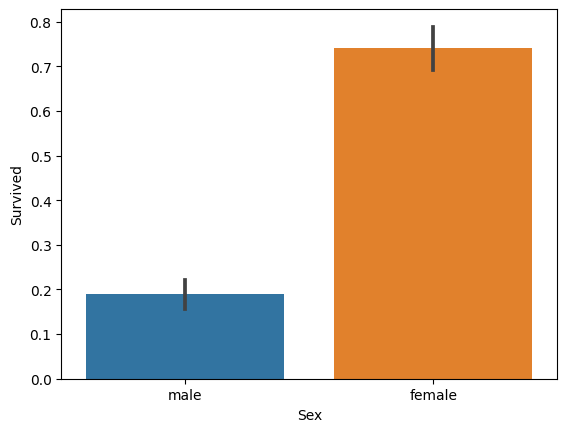

In [322]:
### Exploring data survived people per gender
sns.barplot (x='Sex', y='Survived', data = train)
plt.show()

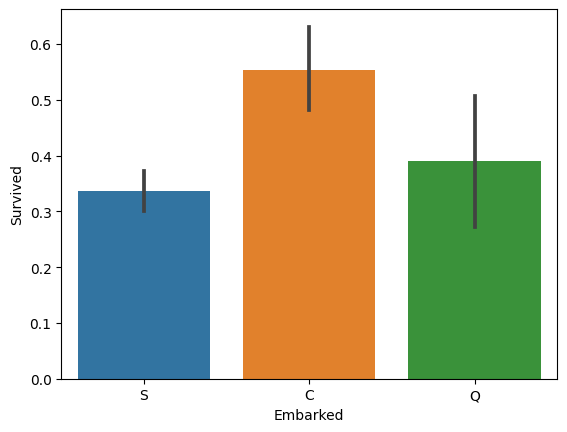

In [323]:
### Exploring data survived people per place they were boarded from
###Boarded passengers grouped (C = Cherbourg, Q = Queenstown, S = Southampton)
sns.barplot (x='Embarked', y='Survived', data = train)
plt.show()

In [324]:
train.describe()

,Survived,Pclass,Age
count,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446
std,0.486260,0.834700,12.968366
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,22.000000
50%,0.000000,3.000000,29.699118
75%,1.000000,3.000000,35.000000
max,1.000000,3.000000,80.000000


In [325]:
### change "Sex" and "Embarked" columns to be integer values
train['Sex'] = train['Sex'].replace({'male': 0, 'female':1})
train['Embarked'] = train['Embarked'].replace({'S': 0, 'C':1, 'Q': 2})
test['Sex'] = test['Sex'].replace({'male': 0, 'female':1})
test['Embarked'] = test['Embarked'].replace({'S': 0, 'C':1, 'Q': 2})

In [326]:
#### Select variables (X and Y)

cols= [ 'Age' ,'Sex', 'Pclass', 'Embarked']
X_train = train[cols]
Y_train = train['Survived']
X_test = test[cols]
Y_test = test['Survived']

In [327]:
## Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)


LogisticRegression()

In [328]:
### make a prediction
pred_survived = logreg.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'predicted': pred_survived})


,Actual,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [329]:
### create confusion matrix accuracy
CM = confusion_matrix(Y_test, pred_survived)
print(CM)
## checking accuracy
print ('Accuracy:', (CM[0][0] + CM [1][1])/418)

[[252  14]
 [  7 145]]
Accuracy: 0.9497607655502392


In [330]:
### F1 , Precision, Recall
F1 = f1_score(Y_test, pred_survived)
Precision = precision_score(Y_test, pred_survived)
Recall = recall_score(Y_test, pred_survived)
print(F1)
print(Precision)
print(Recall)


0.932475884244373
0.9119496855345912
0.9539473684210527
